![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) after `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [20]:
# Import necessary libraries
library(tidyverse)
library(readr)
library(dplyr)
library(ggplot2)

In [21]:
# Start your code here!
# Use as many cells as you like

# Let's start by importing and viewing the data

In [22]:
## start with women
women <- read_csv("women_results.csv")

str(women)
glimpse(women)

New names:
• `` -> `...1`
Rows: 4884 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [4,884 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:4884] 0 1 2 3 4 5 6 7 8 9 ...
 $ date      : Date[1:4884], format: "1969-11-01" "1969-11-01" ...
 $ home_team : chr [1:4884] "Italy" "Denmark" "England" "Italy" ...
 $ away_team : chr [1:4884] "France" "England" "France" "Denmark" ...
 $ home_score: num [1:4884] 1 4 2 3 3 0 3 3 3 0 ...
 $ away_score: num [1:4884] 0 3 0 1 2 2 0 0 0 2 ...
 $ tournament: chr [1:4884] "Euro" "Euro" "Euro" "Euro" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 
Rows: 4,884
Columns: 7
$ ...1       <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ date       <date> 1969-11-01, 1969-11-01, 1969-11-02, 1969-11-02, 1975-08-25…
$ home_team  <chr>

In [23]:
## Now men

men <- read_csv("men_results.csv")

str(men)
glimpse(men)

New names:
• `` -> `...1`
Rows: 44353 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [44,353 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:44353] 0 1 2 3 4 5 6 7 8 9 ...
 $ date      : Date[1:44353], format: "1872-11-30" "1873-03-08" ...
 $ home_team : chr [1:44353] "Scotland" "England" "Scotland" "England" ...
 $ away_team : chr [1:44353] "England" "Scotland" "England" "Scotland" ...
 $ home_score: num [1:44353] 0 4 2 2 3 4 1 0 7 9 ...
 $ away_score: num [1:44353] 0 2 1 2 0 0 3 2 2 0 ...
 $ tournament: chr [1:44353] "Friendly" "Friendly" "Friendly" "Friendly" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 
Rows: 44,353
Columns: 7
$ ...1       <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ date       <date> 1872-11-30, 1873-03-08, 1874-03-07, 1875-03

# Next let's filter the data

In [24]:
## starting with women

women_filtered <- women %>%
filter(date >= "2002-01-01", tournament== "FIFA World Cup")

women_filtered

...1,date,home_team,away_team,home_score,away_score,tournament
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
1605,2003-09-21,Brazil,South Korea,3,0,FIFA World Cup
1606,2003-09-21,Australia,Russia,1,2,FIFA World Cup
1607,2003-09-21,China PR,Ghana,1,0,FIFA World Cup
1609,2003-09-24,Norway,Brazil,1,4,FIFA World Cup


In [25]:
## Now do the same for men

men_filtered <- men %>%
filter(date >= "2002-01-01", tournament== "FIFA World Cup")

men_filtered

...1,date,home_team,away_team,home_score,away_score,tournament
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
25169,2002-06-02,England,Sweden,1,1,FIFA World Cup
25170,2002-06-02,Paraguay,South Africa,2,2,FIFA World Cup
25171,2002-06-02,Spain,Slovenia,3,1,FIFA World Cup
25172,2002-06-03,Brazil,Turkey,2,1,FIFA World Cup


# Next let's determine the number of goals scored per game

In [26]:
## In women_filtered data frame add up the home and away score
women_total_goals <- women_filtered %>%
mutate(total_goals= home_score + away_score)

women_total_goals

...1,date,home_team,away_team,home_score,away_score,tournament,total_goals
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4
1605,2003-09-21,Brazil,South Korea,3,0,FIFA World Cup,3
1606,2003-09-21,Australia,Russia,1,2,FIFA World Cup,3
1607,2003-09-21,China PR,Ghana,1,0,FIFA World Cup,1
1609,2003-09-24,Norway,Brazil,1,4,FIFA World Cup,5


In [27]:
## Now do the same for men
men_total_goals <- men_filtered %>%
mutate(total_goals= home_score + away_score)

men_total_goals

...1,date,home_team,away_team,home_score,away_score,tournament,total_goals
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1
25169,2002-06-02,England,Sweden,1,1,FIFA World Cup,2
25170,2002-06-02,Paraguay,South Africa,2,2,FIFA World Cup,4
25171,2002-06-02,Spain,Slovenia,3,1,FIFA World Cup,4
25172,2002-06-03,Brazil,Turkey,2,1,FIFA World Cup,3


# To determine which hypothesis test to use we need to get a summary of the two data frames


In [28]:
# Let's start with pulling asummary of women

summary(women_total_goals)

      ...1           date             home_team          away_team        
 Min.   :1600   Min.   :2003-09-20   Length:200         Length:200        
 1st Qu.:2156   1st Qu.:2007-09-17   Class :character   Class :character  
 Median :3430   Median :2015-06-07   Mode  :character   Mode  :character  
 Mean   :3094   Mean   :2012-10-01                                        
 3rd Qu.:4418   3rd Qu.:2019-06-08                                        
 Max.   :4469   Max.   :2019-07-07                                        
   home_score       away_score     tournament         total_goals   
 Min.   : 0.000   Min.   :0.000   Length:200         Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.:0.000   Class :character   1st Qu.: 2.00  
 Median : 1.000   Median :1.000   Mode  :character   Median : 3.00  
 Mean   : 1.805   Mean   :1.175                      Mean   : 2.98  
 3rd Qu.: 2.000   3rd Qu.:2.000                      3rd Qu.: 4.00  
 Max.   :13.000   Max.   :7.000                      Max.   :

In [29]:
# Let's do the same for men

summary(men_total_goals)

      ...1            date             home_team          away_team        
 Min.   :25164   Min.   :2002-05-31   Length:384         Length:384        
 1st Qu.:28770   1st Qu.:2006-06-19   Class :character   Class :character  
 Median :34557   Median :2012-06-26   Mode  :character   Mode  :character  
 Mean   :34630   Mean   :2012-07-16                                        
 3rd Qu.:40385   3rd Qu.:2018-06-24                                        
 Max.   :44352   Max.   :2022-12-18                                        
   home_score      away_score     tournament         total_goals   
 Min.   :0.000   Min.   :0.000   Length:384         Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   Class :character   1st Qu.:1.000  
 Median :1.000   Median :1.000   Mode  :character   Median :2.000  
 Mean   :1.375   Mean   :1.138                      Mean   :2.513  
 3rd Qu.:2.000   3rd Qu.:2.000                      3rd Qu.:3.000  
 Max.   :8.000   Max.   :7.000                      Max.   :

## Looking at the summary of the total_goals column both men and women do not appear to be normally distributed. 
Let's plot them to confirm

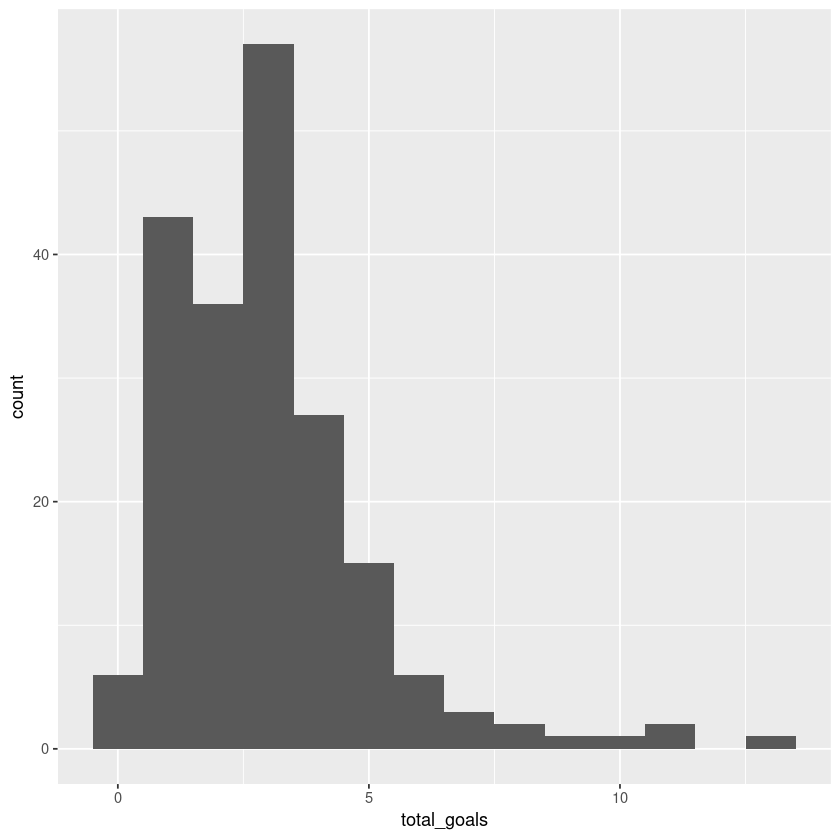

In [30]:
#Let's graph women's first
ggplot(women_total_goals, aes(total_goals))+
geom_histogram(binwidth = 1)

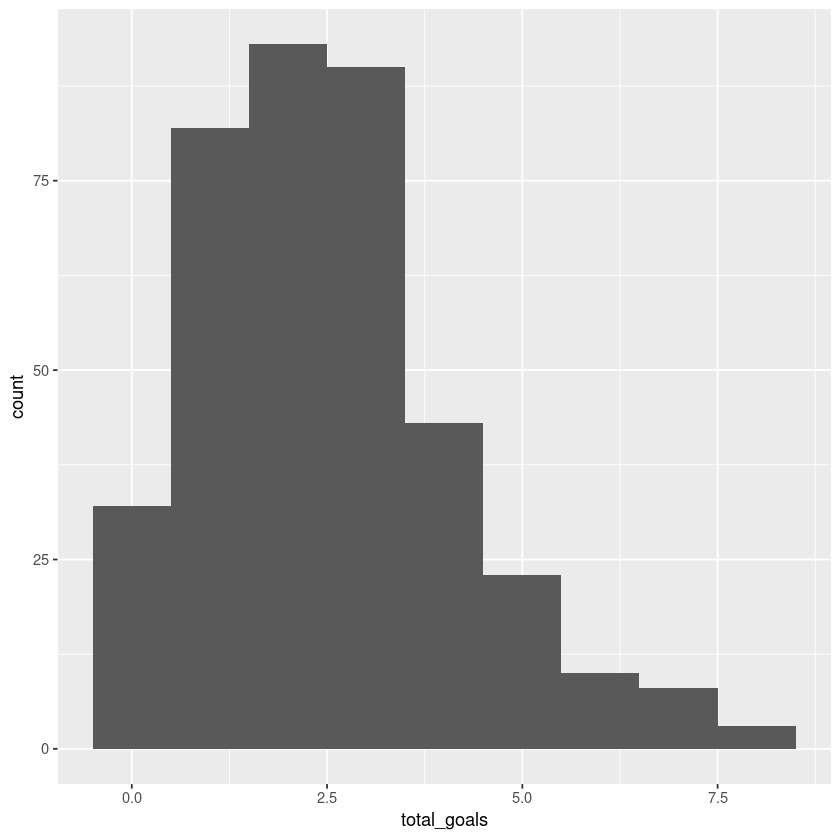

In [31]:
# Let's do the same for men

ggplot(men_total_goals, aes(total_goals))+
geom_histogram(binwidth = 1)

## After plotting we can tell both women and men are not evenly distributed.
This means we should use a wilcoxin test

In [32]:
# call a wilcoxin test
hypothesis_test <- wilcox.test (x=women_total_goals$total_goals,
							   y=men_total_goals$total_goals,
							   alternative="greater")

hypothesis_test


	Wilcoxon rank sum test with continuity correction

data:  women_total_goals$total_goals and men_total_goals$total_goals
W = 43273, p-value = 0.005107
alternative hypothesis: true location shift is greater than 0


# Because the p value is less tha 0.1 we would reject the null hypothesis. 
Let's turn this into a data frame for our answer

In [33]:
#start by creating vectors with the desired results
p_val <-0.0051
result <- "reject"

#Create a data frame from the above vectors
result_df <- data.frame (p_val, result)

result_df

p_val,result
<dbl>,<chr>
0.0051,reject
